In [1]:
# Importamos la librería necesaria
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [2]:
# Leemos los csv con los datos
ruta = "/mnt/c/Users/migue/Documents/Python/UNIR/TFE/datos_procesados.csv"
datos = pd.read_csv(ruta, sep=';', decimal='.')

### Tratamiento de los datos

In [3]:
datos[datos['error'] != 'N']

,id,fecha,intensidad,ocupacion,carga,vmed,error,ANO,MES,DIA,HORA,MINUTO,DIA_SEMANA,TEMPERATURA,PRECIPITACION,FESTIVO
1313,3490,2023-01-14 22:30:00,3944.000000,8.000000,68.000000,60.000000,S,2023,1,14,22,30,5,5.7,0.0,0.0
2072,3490,2023-01-23 05:15:00,124.000000,0.000000,4.000000,19.000000,S,2023,1,23,5,15,0,-0.2,0.0,0.0
2073,3490,2023-01-23 05:30:00,0.000000,0.000000,0.000000,0.000000,S,2023,1,23,5,30,0,-0.2,0.0,0.0
2074,3490,2023-01-23 05:45:00,0.000000,0.000000,0.000000,0.000000,S,2023,1,23,5,45,0,-0.2,0.0,0.0
2075,3490,2023-01-23 06:00:00,0.000000,0.000000,0.000000,0.000000,S,2023,1,23,6,0,0,-0.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534735,10268,2024-08-06 15:30:00,2110.559709,15.415082,69.632984,58.896898,S,2024,8,6,15,30,1,37.3,0.0,0.0
3534736,10661,2023-03-29 17:15:00,2115.578726,13.082195,66.929157,62.114713,S,2023,3,29,17,15,2,25.7,0.0,0.0
3534737,10661,2023-08-26 06:15:00,530.230428,2.215024,17.360203,72.072970,S,2023,8,26,6,15,5,26.5,0.0,0.0
3534738,10661,2023-08-26 09:45:00,1431.934314,6.581503,44.586540,68.220496,S,2023,8,26,9,45,5,25.5,0.0,0.0


In [4]:
# Calcular los promedios agrupados por las columnas clave
promedios = datos.groupby(['id', 'HORA', 'MINUTO', 'DIA_SEMANA', 'FESTIVO'])[['intensidad', 'ocupacion', 'carga', 'vmed']].transform('mean')

# Redondear los promedios a 2 decimales
promedios = promedios.round(2)

# Aplicar los promedios solo donde 'error' sea 'S'
datos.loc[datos['error'] == 'S', ['intensidad', 'ocupacion', 'carga', 'vmed']] = \
    datos.loc[datos['error'] == 'S', ['id', 'HORA', 'MINUTO', 'DIA_SEMANA', 'FESTIVO']].merge(
        promedios, left_index=True, right_index=True
    )[promedios.columns].values

In [5]:
datos[datos['error'] != 'N']

,id,fecha,intensidad,ocupacion,carga,vmed,error,ANO,MES,DIA,HORA,MINUTO,DIA_SEMANA,TEMPERATURA,PRECIPITACION,FESTIVO
1313,3490,2023-01-14 22:30:00,3786.41,7.59,65.69,65.84,S,2023,1,14,22,30,5,5.7,0.0,0.0
2072,3490,2023-01-23 05:15:00,500.61,0.21,8.74,73.70,S,2023,1,23,5,15,0,-0.2,0.0,0.0
2073,3490,2023-01-23 05:30:00,630.74,0.45,11.08,73.79,S,2023,1,23,5,30,0,-0.2,0.0,0.0
2074,3490,2023-01-23 05:45:00,901.34,0.86,15.97,74.57,S,2023,1,23,5,45,0,-0.2,0.0,0.0
2075,3490,2023-01-23 06:00:00,1207.80,1.38,21.59,74.28,S,2023,1,23,6,0,0,-0.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534735,10268,2024-08-06 15:30:00,1819.68,28.86,73.96,32.47,S,2024,8,6,15,30,1,37.3,0.0,0.0
3534736,10661,2023-03-29 17:15:00,852.54,8.79,50.56,60.50,S,2023,3,29,17,15,2,25.7,0.0,0.0
3534737,10661,2023-08-26 06:15:00,192.06,1.65,11.89,62.87,S,2023,8,26,6,15,5,26.5,0.0,0.0
3534738,10661,2023-08-26 09:45:00,597.34,5.67,36.18,60.84,S,2023,8,26,9,45,5,25.5,0.0,0.0


### Preparación de los conjuntos e entrenamiento y validación  
Vamos a comntemplar 2 casuísticas:  
- Modelo que analice el estado global de todas las esaciones. En este caso vamos a tomar la media de los valores de todas las estaciones para el mismo momento y entrenaremos un modelo sobre dicho conjunto de datos.
- Modelo que analice una estación de medición.  
  
Posteriormente, vamos a probar los dos modelos para predecir la intensidad del tráfico en una estación.

In [6]:
# Eliminar la columna 'error'
datos = datos.drop(columns=['error'])

#### Conjunto de datos para todas las estaciones

In [7]:
# Creamos un nuevo dataframe para preparar los datos de todas las estaciones
datos_todas = datos

In [8]:
# Eliminamos las columna id
datos_todas = datos_todas.drop(columns=['id'])

# Agrupamos los datos tomando la media para cada intervalo
datos_todas = datos_todas.groupby(
    ['fecha', 'ANO', 'MES', 'DIA', 'HORA', 'MINUTO', 'DIA_SEMANA']
)[['intensidad', 'ocupacion', 'carga', 'vmed', 'TEMPERATURA', 'PRECIPITACION', 'FESTIVO']].mean().reset_index()

# Redondear a dos decimales
datos_todas = datos_todas.round(2)

# Ordenar el DataFrame por la columna 'fecha'
datos_todas = datos_todas.sort_values(by='fecha').reset_index(drop=True)

datos_todas

,fecha,ANO,MES,DIA,HORA,MINUTO,DIA_SEMANA,intensidad,ocupacion,carga,vmed,TEMPERATURA,PRECIPITACION,FESTIVO
0,2023-01-01 00:00:00,2023,1,1,0,0,6,192.00,1.16,6.93,69.69,7.6,0.0,0.0
1,2023-01-01 00:15:00,2023,1,1,0,15,6,164.73,0.75,5.65,65.35,7.6,0.0,0.0
2,2023-01-01 00:30:00,2023,1,1,0,30,6,635.38,1.58,20.05,74.82,7.6,0.0,0.0
3,2023-01-01 00:45:00,2023,1,1,0,45,6,1234.29,5.05,38.98,72.51,7.6,0.0,0.0
4,2023-01-01 01:00:00,2023,1,1,1,0,6,1701.24,8.20,52.78,68.58,7.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64263,2024-10-31 22:45:00,2024,10,31,22,45,3,1393.84,6.44,44.48,69.06,17.4,0.0,0.0
64264,2024-10-31 23:00:00,2024,10,31,23,0,3,1269.22,6.06,40.80,69.54,17.0,0.0,0.0
64265,2024-10-31 23:15:00,2024,10,31,23,15,3,1255.11,5.60,40.27,70.07,17.0,0.0,0.0
64266,2024-10-31 23:30:00,2024,10,31,23,30,3,1278.45,6.05,40.89,69.89,17.0,0.0,0.0


Vamos a ver una serie de gráficas de los datos unificados. Esto nos ayudará a entender la distribución de los datos.

/tmp/ipykernel_187911/4185856575.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hora_minuto'] = filtered_data['HORA'].astype(str) + ':' + filtered_data['MINUTO'].astype(str).str.zfill(2)


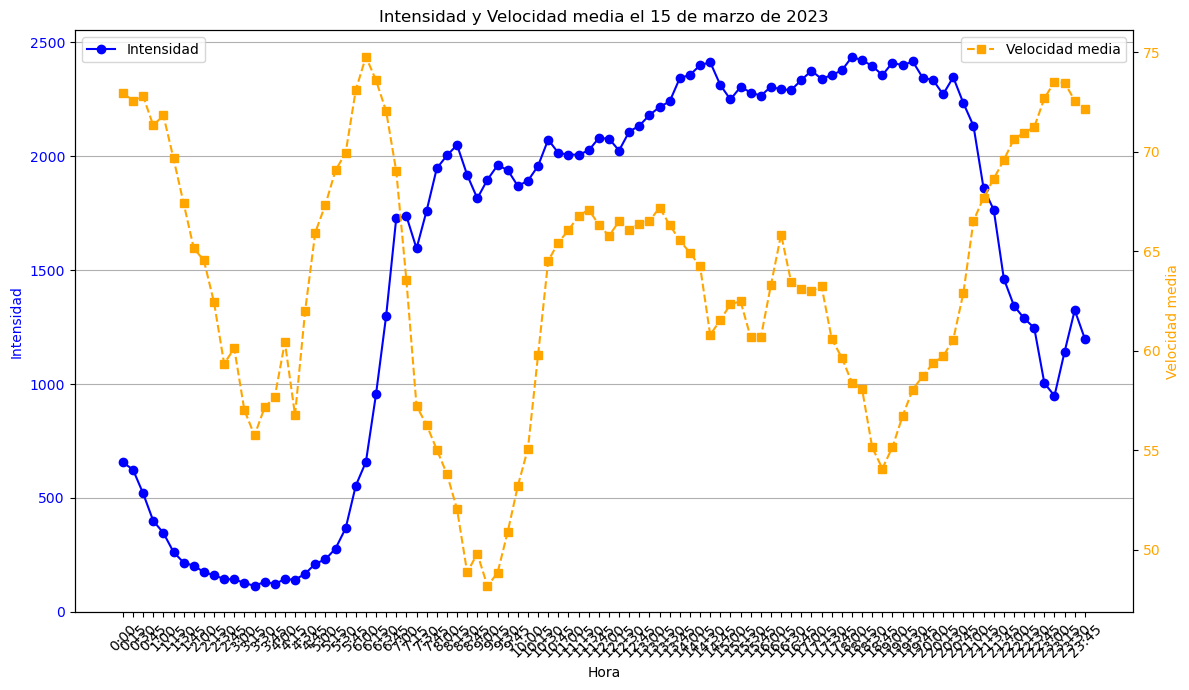

In [9]:
# Filtrar los datos del día 15 de marzo de 2023
filtered_data = datos_todas[(datos_todas['ANO'] == 2023) & (datos_todas['MES'] == 3) & (datos_todas['DIA'] == 15)]

# Crear etiquetas para el eje X concatenando HORA y MINUTO
filtered_data['hora_minuto'] = filtered_data['HORA'].astype(str) + ':' + filtered_data['MINUTO'].astype(str).str.zfill(2)

# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(12, 7))

# Graficar la intensidad en el eje Y izquierdo
ax1.plot(filtered_data['hora_minuto'], filtered_data['intensidad'], color='blue', marker='o', linestyle='-', label='Intensidad')
ax1.set_xlabel('Hora')  # Etiqueta del eje X
ax1.set_ylabel('Intensidad', color='blue')  # Etiqueta del eje Y izquierdo
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(axis='y')  # Cuadrícula para el eje Y izquierdo

# Crear un segundo eje Y para la ocupación
ax2 = ax1.twinx()
ax2.plot(filtered_data['hora_minuto'], filtered_data['vmed'], color='orange', marker='s', linestyle='--', label='Velocidad media')
ax2.set_ylabel('Velocidad media', color='orange')  # Etiqueta del eje Y derecho
ax2.tick_params(axis='y', labelcolor='orange')

# Girar las etiquetas del eje X
ax1.set_xticks(range(len(filtered_data['hora_minuto'])))
ax1.set_xticklabels(filtered_data['hora_minuto'], rotation=45)

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('Intensidad y Velocidad media el 15 de marzo de 2023')

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

/tmp/ipykernel_187911/3489757606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['intensidad'] = filtered_data['intensidad'].clip(lower=0)


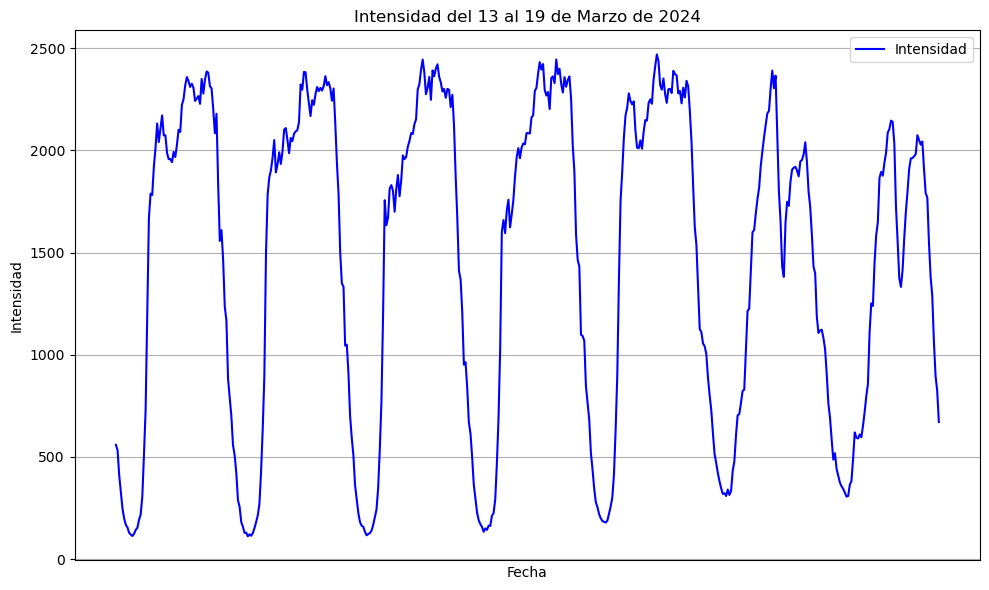

In [10]:
# Filtrar los datos entre el 1 y el 7 de marzo de 2024
filtered_data = datos_todas[(datos_todas['fecha'] >= "2023-03-06") & (datos_todas['fecha'] < "2023-03-13")]

# Reemplazar los valores de intensidad menores a cero por cero
filtered_data['intensidad'] = filtered_data['intensidad'].clip(lower=0)

# Convertir las fechas a números (para usar con el interpolador)
x = np.array([i for i in range(len(filtered_data))])
y = filtered_data['intensidad'].values

# Crear un spline cúbico para suavizar la línea
spl = make_interp_spline(x, y, k=3)

# Generar un rango de puntos más denso para la suavización
x_new = np.linspace(x.min(), x.max(), 500)
y_new = spl(x_new)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_new, y_new, color='blue', linestyle='-', label='Intensidad')  # Línea suavizada
plt.xlabel('Fecha')  # Etiqueta del eje X
plt.ylabel('Intensidad')  # Etiqueta del eje Y
plt.title('Intensidad del 13 al 19 de Marzo de 2024')  # Título del gráfico
plt.grid(axis='y')  # Cuadrícula en el eje Y

# Eliminar las etiquetas del eje X
plt.xticks([])

# Leyenda
plt.legend()

# Ajustar el diseño para que no se sobrepongan elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Vamos a ver la matriz de correlación de los datos unificados. Esto nos ayudará a saber que variables son las óptimas a la hora de construir el modelo.

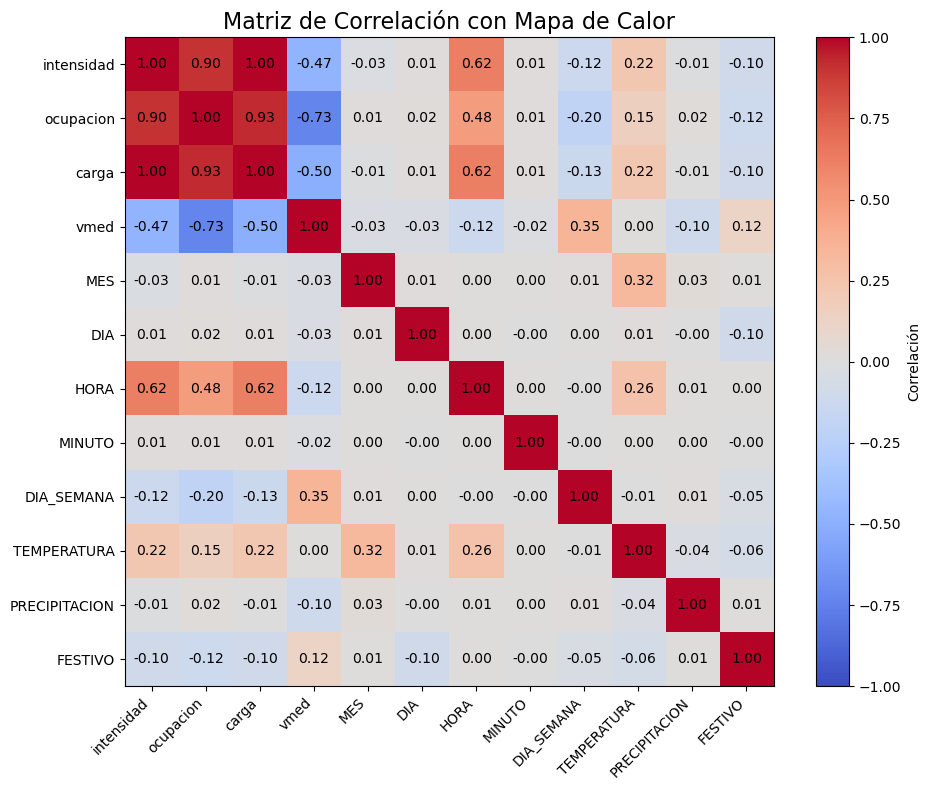

In [11]:
# Seleccionar solo las columnas numéricas de interés para la correlación
columns_to_correlate = ['intensidad', 'ocupacion', 'carga', 'vmed', 'MES', 'DIA', 'HORA', 'MINUTO', 'DIA_SEMANA', 'TEMPERATURA', 'PRECIPITACION', 'FESTIVO']

# Asegurarse de que todas las columnas seleccionadas son numéricas
datos_todas_corr = datos_todas[columns_to_correlate].apply(pd.to_numeric, errors='coerce')

# Calcular la matriz de correlación
correlation_matrix = datos_todas_corr.corr()

# Crear el gráfico
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura

# Usar el método imshow para visualizar la matriz de correlación como un mapa de calor
cax = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', vmin=-1, vmax=1)

# Agregar una barra de color
plt.colorbar(cax, label='Correlación')

# Ajustar las etiquetas de los ejes X e Y
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

# Agregar los valores de correlación en cada celda
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Título y etiquetas
plt.title('Matriz de Correlación con Mapa de Calor', fontsize=16)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Dividimos los datos en:
- Entrenamiento - Del 1 de enero al 31 de diciembre de 2023
- Validación - Del 1 de enero al 31 de marzo de 2024

In [12]:
# Creamos el conjunto de entrenamiento con los datos entre el 1 de enero de 2023 y el 31 de diciembre de dicho año
filtro_train = (datos_todas['fecha'] < '2024-01-01')

# Creamos un conjunto de prueba con los datos entre el 1 de enero de 2024 y el 31 de marzo de dicho año
filtro_prueba = (datos_todas['fecha'] >= '2024-01-01') & (datos_todas['fecha'] <= '2024-03-31')

# Aplicar el filtro
datos_todas_train = datos_todas[filtro_train]
datos_todas_prueba = datos_todas[filtro_prueba]

In [13]:
datos_todas_train

,fecha,ANO,MES,DIA,HORA,MINUTO,DIA_SEMANA,intensidad,ocupacion,carga,vmed,TEMPERATURA,PRECIPITACION,FESTIVO
0,2023-01-01 00:00:00,2023,1,1,0,0,6,192.00,1.16,6.93,69.69,7.6,0.0,0.0
1,2023-01-01 00:15:00,2023,1,1,0,15,6,164.73,0.75,5.65,65.35,7.6,0.0,0.0
2,2023-01-01 00:30:00,2023,1,1,0,30,6,635.38,1.58,20.05,74.82,7.6,0.0,0.0
3,2023-01-01 00:45:00,2023,1,1,0,45,6,1234.29,5.05,38.98,72.51,7.6,0.0,0.0
4,2023-01-01 01:00:00,2023,1,1,1,0,6,1701.24,8.20,52.78,68.58,7.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35002,2023-12-31 22:45:00,2023,12,31,22,45,6,375.76,1.51,12.18,72.29,7.0,0.0,0.0
35003,2023-12-31 23:00:00,2023,12,31,23,0,6,375.31,1.58,12.00,71.82,6.9,0.0,0.0
35004,2023-12-31 23:15:00,2023,12,31,23,15,6,350.55,1.60,11.29,72.42,6.9,0.0,0.0
35005,2023-12-31 23:30:00,2023,12,31,23,30,6,329.62,1.36,10.65,71.87,6.9,0.0,0.0


In [14]:
datos_todas_train.to_csv('/mnt/c/Users/migue/Documents/Python/UNIR/TFE/datos_procesados_todas_train.csv', index=False, sep=';')
datos_todas_prueba.to_csv('/mnt/c/Users/migue/Documents/Python/UNIR/TFE/datos_procesados_todas_prueba.csv', index=False, sep=';')

#### Conjunto de datos para las estaciones por separado  
En este caso vamos a crear una nueva variable que nos indique el estado de todas las estaciones analizadas. Es decir, esta nueva variable contendrá la intensidad media del resto de estaciones de medición.

In [15]:
# Creamos un nuevo dataframe para preparar los datos de todas las estaciones
datos_estaciones = datos

In [16]:
## Para todas las estaciones vamos a crear una nueva columna que contenga la media de intensidad del resto de estaciones en ese momento
# Columnas por las que agrupamos
group_cols = ['fecha', 'ANO', 'MES', 'DIA', 'HORA', 'MINUTO', 'DIA_SEMANA']
# Calculamos la intensidad media del resto de estaciones en el mismo momento
datos_estaciones['intensidad_media'] = datos_estaciones.groupby(group_cols)['intensidad'].transform(
    lambda x: (x.sum() - x) / (len(x) - 1)
)

# Convertimos la columna 'intensidad_media' a enteros
datos_estaciones['intensidad_media'] = datos_estaciones['intensidad_media'].astype(int)

# Ordenar el DataFrame por la columna 'fecha'
datos_estaciones = datos_estaciones.sort_values(by=['id','fecha']).reset_index(drop=True)

datos_estaciones

,id,fecha,intensidad,ocupacion,carga,vmed,ANO,MES,DIA,HORA,MINUTO,DIA_SEMANA,TEMPERATURA,PRECIPITACION,FESTIVO,intensidad_media
0,3490,2023-01-01 00:00:00,488.0,0.0,10.0,80.0,2023,1,1,0,0,6,7.6,0.0,0.0,186
1,3490,2023-01-01 00:15:00,396.0,0.0,7.0,77.0,2023,1,1,0,15,6,7.6,0.0,0.0,160
2,3490,2023-01-01 00:30:00,1484.0,1.0,25.0,74.0,2023,1,1,0,30,6,7.6,0.0,0.0,619
3,3490,2023-01-01 00:45:00,2752.0,4.0,48.0,70.0,2023,1,1,0,45,6,7.6,0.0,0.0,1206
4,3490,2023-01-01 01:00:00,3976.0,7.0,68.0,67.0,2023,1,1,1,0,6,7.5,0.0,0.0,1659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534735,10661,2024-10-31 22:45:00,628.0,6.0,38.0,62.0,2024,10,31,22,45,3,17.4,0.0,0.0,1408
3534736,10661,2024-10-31 23:00:00,549.0,5.0,34.0,63.0,2024,10,31,23,0,3,17.0,0.0,0.0,1282
3534737,10661,2024-10-31 23:15:00,531.0,4.0,33.0,68.0,2024,10,31,23,15,3,17.0,0.0,0.0,1268
3534738,10661,2024-10-31 23:30:00,516.0,6.0,32.0,63.0,2024,10,31,23,30,3,17.0,0.0,0.0,1292


Nos quedamos con la estación 6667. Mostramos algunas gráficas para entender los datos.

/tmp/ipykernel_187911/2328104950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hora_minuto'] = filtered_data['HORA'].astype(str) + ':' + filtered_data['MINUTO'].astype(str).str.zfill(2)


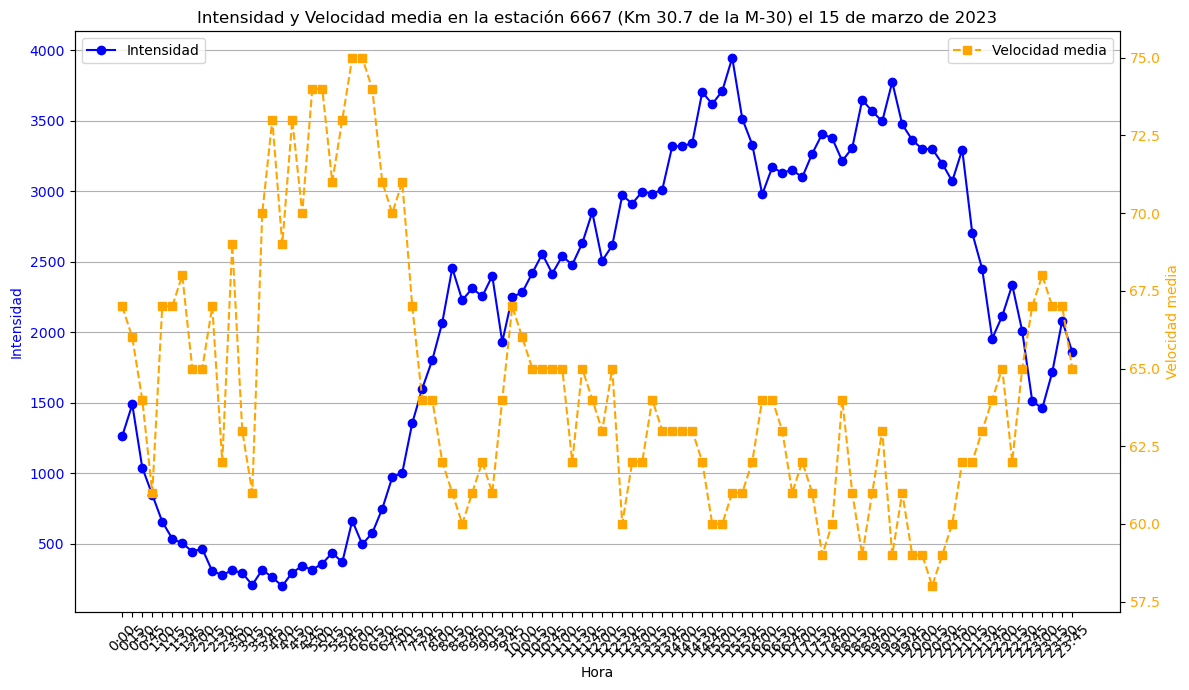

In [17]:
# Filtrar los datos del día 15 de marzo de 2023
filtered_data = datos_estaciones[(datos_estaciones['id'] == 6667) & (datos_estaciones['ANO'] == 2023) & (datos_estaciones['MES'] == 3) & (datos_estaciones['DIA'] == 15)]

# Crear etiquetas para el eje X concatenando HORA y MINUTO
filtered_data['hora_minuto'] = filtered_data['HORA'].astype(str) + ':' + filtered_data['MINUTO'].astype(str).str.zfill(2)

# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(12, 7))

# Graficar la intensidad en el eje Y izquierdo
ax1.plot(filtered_data['hora_minuto'], filtered_data['intensidad'], color='blue', marker='o', linestyle='-', label='Intensidad')
ax1.set_xlabel('Hora')  # Etiqueta del eje X
ax1.set_ylabel('Intensidad', color='blue')  # Etiqueta del eje Y izquierdo
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(axis='y')  # Cuadrícula para el eje Y izquierdo

# Crear un segundo eje Y para la ocupación
ax2 = ax1.twinx()
ax2.plot(filtered_data['hora_minuto'], filtered_data['vmed'], color='orange', marker='s', linestyle='--', label='Velocidad media')
ax2.set_ylabel('Velocidad media', color='orange')  # Etiqueta del eje Y derecho
ax2.tick_params(axis='y', labelcolor='orange')

# Girar las etiquetas del eje X
ax1.set_xticks(range(len(filtered_data['hora_minuto'])))
ax1.set_xticklabels(filtered_data['hora_minuto'], rotation=45)

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('Intensidad y Velocidad media en la estación 6667 (Km 30.7 de la M-30) el 15 de marzo de 2023')

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

/tmp/ipykernel_187911/3501511680.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hora_minuto'] = filtered_data['HORA'].astype(str) + ':' + filtered_data['MINUTO'].astype(str).str.zfill(2)


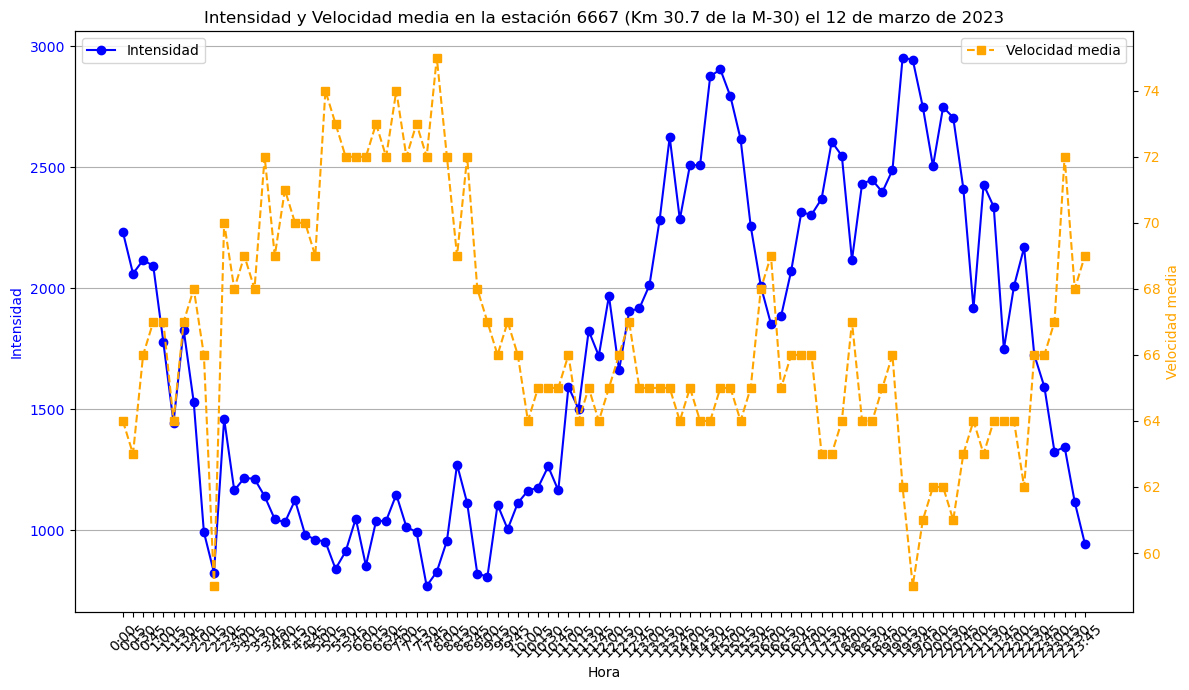

In [18]:
# Filtrar los datos del día 12 de marzo de 2023
filtered_data = datos_estaciones[(datos_estaciones['id'] == 6667) & (datos_estaciones['ANO'] == 2023) & (datos_estaciones['MES'] == 3) & (datos_estaciones['DIA'] == 12)]

# Crear etiquetas para el eje X concatenando HORA y MINUTO
filtered_data['hora_minuto'] = filtered_data['HORA'].astype(str) + ':' + filtered_data['MINUTO'].astype(str).str.zfill(2)

# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(12, 7))

# Graficar la intensidad en el eje Y izquierdo
ax1.plot(filtered_data['hora_minuto'], filtered_data['intensidad'], color='blue', marker='o', linestyle='-', label='Intensidad')
ax1.set_xlabel('Hora')  # Etiqueta del eje X
ax1.set_ylabel('Intensidad', color='blue')  # Etiqueta del eje Y izquierdo
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(axis='y')  # Cuadrícula para el eje Y izquierdo

# Crear un segundo eje Y para la ocupación
ax2 = ax1.twinx()
ax2.plot(filtered_data['hora_minuto'], filtered_data['vmed'], color='orange', marker='s', linestyle='--', label='Velocidad media')
ax2.set_ylabel('Velocidad media', color='orange')  # Etiqueta del eje Y derecho
ax2.tick_params(axis='y', labelcolor='orange')

# Girar las etiquetas del eje X
ax1.set_xticks(range(len(filtered_data['hora_minuto'])))
ax1.set_xticklabels(filtered_data['hora_minuto'], rotation=45)

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('Intensidad y Velocidad media en la estación 6667 (Km 30.7 de la M-30) el 12 de marzo de 2023')

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

/tmp/ipykernel_187911/1081975940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['intensidad'] = filtered_data['intensidad'].clip(lower=0)


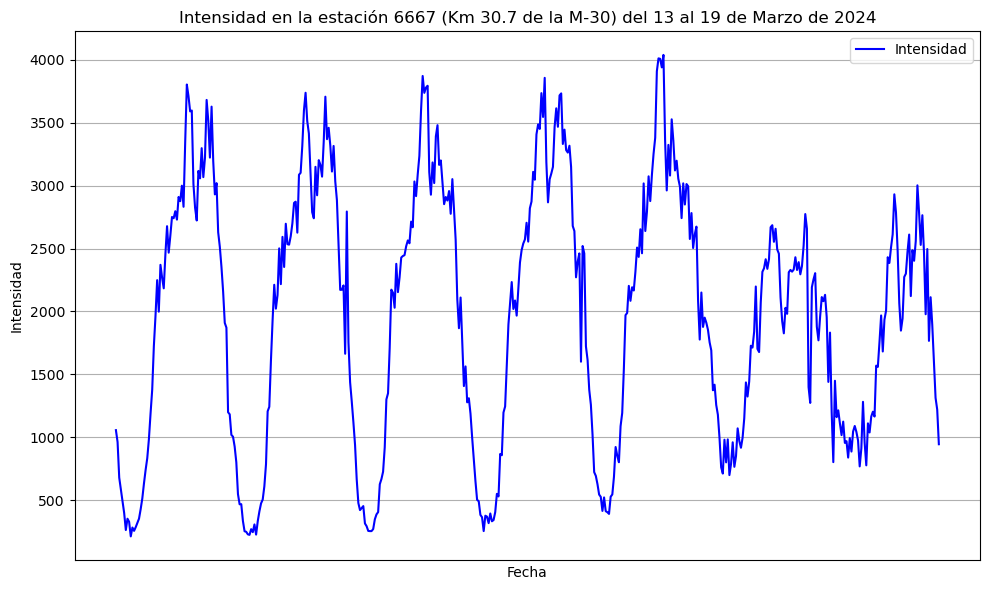

In [19]:
# Filtrar los datos entre el 1 y el 7 de marzo de 2024
filtered_data = datos_estaciones[(datos_estaciones['id'] == 6667) & (datos_estaciones['fecha'] >= "2023-03-06") & (datos_estaciones['fecha'] < "2023-03-13")]

# Reemplazar los valores de intensidad menores a cero por cero
filtered_data['intensidad'] = filtered_data['intensidad'].clip(lower=0)

# Convertir las fechas a números (para usar con el interpolador)
x = np.array([i for i in range(len(filtered_data))])
y = filtered_data['intensidad'].values

# Crear un spline cúbico para suavizar la línea
spl = make_interp_spline(x, y, k=3)

# Generar un rango de puntos más denso para la suavización
x_new = np.linspace(x.min(), x.max(), 500)
y_new = spl(x_new)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_new, y_new, color='blue', linestyle='-', label='Intensidad')  # Línea suavizada
plt.xlabel('Fecha')  # Etiqueta del eje X
plt.ylabel('Intensidad')  # Etiqueta del eje Y
plt.title('Intensidad en la estación 6667 (Km 30.7 de la M-30) del 13 al 19 de Marzo de 2024')  # Título del gráfico
plt.grid(axis='y')  # Cuadrícula en el eje Y

# Eliminar las etiquetas del eje X
plt.xticks([])

# Leyenda
plt.legend()

# Ajustar el diseño para que no se sobrepongan elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

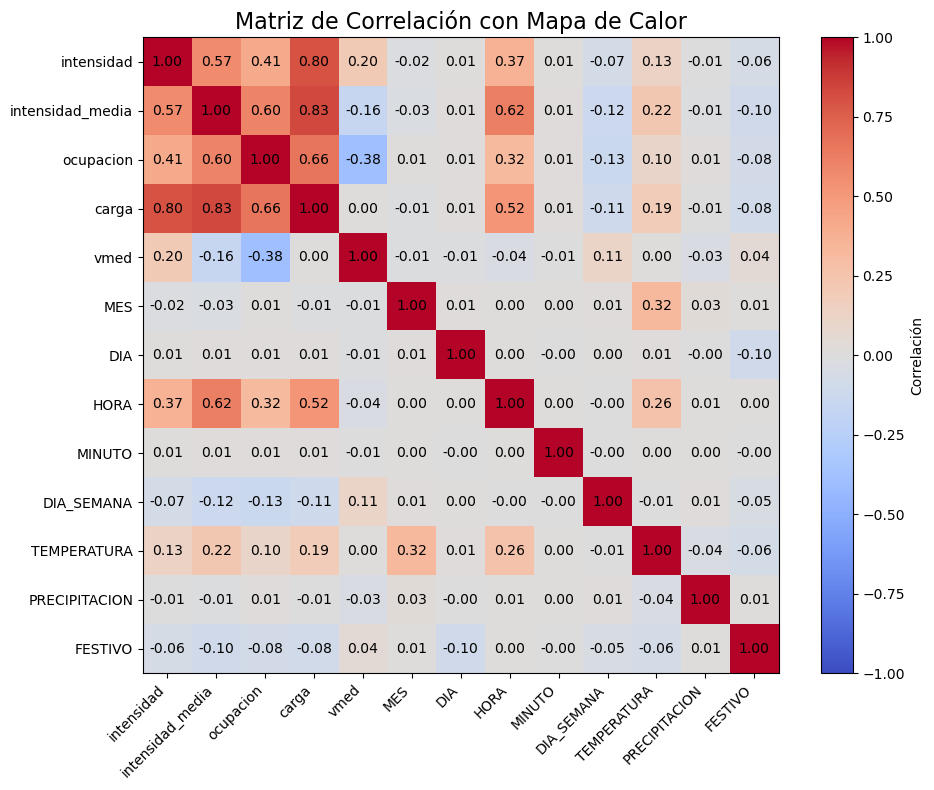

In [20]:
# Seleccionar solo las columnas numéricas de interés para la correlación
columns_to_correlate = ['intensidad', 'intensidad_media', 'ocupacion', 'carga', 'vmed', 'MES', 'DIA', 'HORA', 'MINUTO', 'DIA_SEMANA', 'TEMPERATURA', 'PRECIPITACION', 'FESTIVO']

# Asegurarse de que todas las columnas seleccionadas son numéricas
datos_estaciones_corr = datos_estaciones[columns_to_correlate].apply(pd.to_numeric, errors='coerce')

# Calcular la matriz de correlación
correlation_matrix = datos_estaciones_corr.corr()

# Crear el gráfico
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura

# Usar el método imshow para visualizar la matriz de correlación como un mapa de calor
cax = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', vmin=-1, vmax=1)

# Agregar una barra de color
plt.colorbar(cax, label='Correlación')

# Ajustar las etiquetas de los ejes X e Y
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

# Agregar los valores de correlación en cada celda
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Título y etiquetas
plt.title('Matriz de Correlación con Mapa de Calor', fontsize=16)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Dividimos los datos en:
- Entrenamiento - Del 1 de enero al 31 de diciembre de 2023
- Validación - Del 1 de enero al 31 de marzo de 2024

In [21]:
# Creamos el conjunto de entrenamiento con los datos entre el 1 de enero de 2023 y el 31 de diciembre de dicho año
filtro_train = (datos_estaciones['fecha'] < '2024-01-01')

# Creamos un conjunto de prueba con los datos entre el 1 de enero de 2024 y el 31 de marzo de dicho año
filtro_prueba = (datos_estaciones['fecha'] >= '2024-01-01') & (datos_estaciones['fecha'] <= '2024-03-31')

# Aplicar el filtro
datos_estaciones_train = datos_estaciones[filtro_train]
datos_estaciones_prueba = datos_estaciones[filtro_prueba]

In [22]:
datos_estaciones_train

,id,fecha,intensidad,ocupacion,carga,vmed,ANO,MES,DIA,HORA,MINUTO,DIA_SEMANA,TEMPERATURA,PRECIPITACION,FESTIVO,intensidad_media
0,3490,2023-01-01 00:00:00,488.0,0.0,10.0,80.0,2023,1,1,0,0,6,7.6,0.0,0.0,186
1,3490,2023-01-01 00:15:00,396.0,0.0,7.0,77.0,2023,1,1,0,15,6,7.6,0.0,0.0,160
2,3490,2023-01-01 00:30:00,1484.0,1.0,25.0,74.0,2023,1,1,0,30,6,7.6,0.0,0.0,619
3,3490,2023-01-01 00:45:00,2752.0,4.0,48.0,70.0,2023,1,1,0,45,6,7.6,0.0,0.0,1206
4,3490,2023-01-01 01:00:00,3976.0,7.0,68.0,67.0,2023,1,1,1,0,6,7.5,0.0,0.0,1659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505474,10661,2023-12-31 22:45:00,128.0,1.0,7.0,61.0,2023,12,31,22,45,6,7.0,0.0,0.0,380
3505475,10661,2023-12-31 23:00:00,112.0,1.0,7.0,60.0,2023,12,31,23,0,6,6.9,0.0,0.0,380
3505476,10661,2023-12-31 23:15:00,112.0,1.0,8.0,71.0,2023,12,31,23,15,6,6.9,0.0,0.0,354
3505477,10661,2023-12-31 23:30:00,100.0,1.0,7.0,60.0,2023,12,31,23,30,6,6.9,0.0,0.0,333


In [23]:
datos_estaciones_train.to_csv('/mnt/c/Users/migue/Documents/Python/UNIR/TFE/datos_procesados_estaciones_train.csv', index=False, sep=';')
datos_estaciones_prueba.to_csv('/mnt/c/Users/migue/Documents/Python/UNIR/TFE/datos_procesados_estaciones_prueba.csv', index=False, sep=';')